In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
dataset_dir = "C:/Users/weesh/dsa4262-project/data/suggested/train"
image_size = (224, 224)
batch_size = 32
num_classes = 4  # Change this to the number of classes in your dataset

In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))


In [4]:
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add your custom classification head
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

In [5]:
# Define data augmentation and preprocessing for your dataset
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # You can adjust the split ratio for validation data
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify training subset
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify validation subset
)

Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [10]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 20  # You can adjust the number of epochs
history=model.fit(train_generator, epochs=epochs, validation_data=validation_generator)


Epoch 1/20
150/150 [==============================] - 514s 3s/step - loss: 0.8013 - accuracy: 0.6623 - val_loss: 0.9628 - val_accuracy: 0.6025
Epoch 2/20
150/150 [==============================] - 513s 3s/step - loss: 0.7544 - accuracy: 0.6996 - val_loss: 1.0282 - val_accuracy: 0.5958
Epoch 3/20
150/150 [==============================] - 1674s 11s/step - loss: 0.7331 - accuracy: 0.6988 - val_loss: 0.9382 - val_accuracy: 0.6267
Epoch 4/20
150/150 [==============================] - 512s 3s/step - loss: 0.7094 - accuracy: 0.7163 - val_loss: 1.0075 - val_accuracy: 0.6133
Epoch 5/20
150/150 [==============================] - 508s 3s/step - loss: 0.7236 - accuracy: 0.6996 - val_loss: 0.9565 - val_accuracy: 0.6017
Epoch 6/20
150/150 [==============================] - 505s 3s/step - loss: 0.7099 - accuracy: 0.7188 - val_loss: 0.9939 - val_accuracy: 0.6183
Epoch 7/20
150/150 [==============================] - 506s 3s/step - loss: 0.6959 - accuracy: 0.7165 - val_loss: 0.9018 - val_accuracy: 0.64

KeyboardInterrupt: 

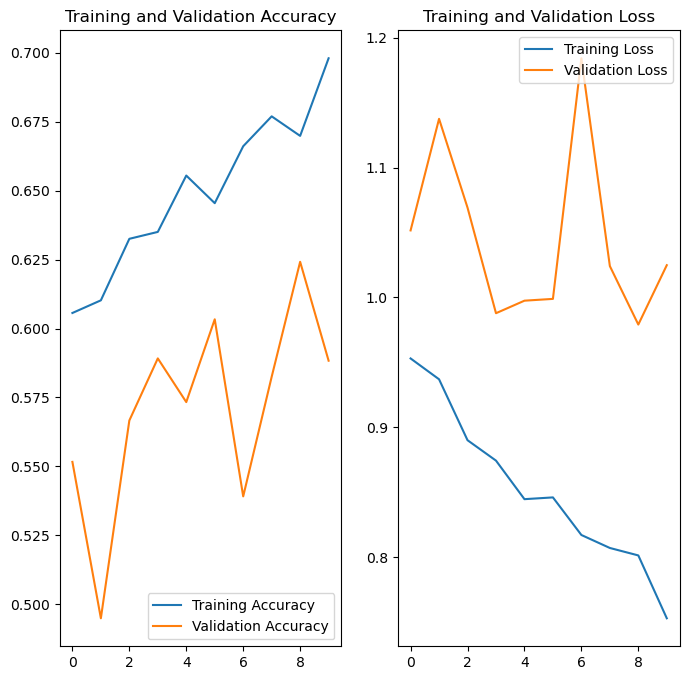

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()